<a href="https://colab.research.google.com/github/KonstantinSergeev2/Data-analysis/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Пункт 1 - загрузка данных.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загружаем данные.
dataF = pd.read_csv('sample_data/weather1.csv', sep=';',
                  usecols=['Местное время в Перми', 'T', 'P', 'U', 'Ff', 'N', 'H', 'VV'],
                  parse_dates=['Местное время в Перми'],
                  dayfirst=True,
                  encoding='cp1251')


dataF.columns = ['time', 'temperature', 'atmosphere_davlenie', 'Vlashnost', 'Speed_Vetra', 'Oblachnost', 'cloud_height', 'Dalnost_vidimosty']

# Обрабатываем облачность.
dataF['Oblachnost'] = dataF['Oblachnost'].str.replace('%', '').str.replace('.', '')
dataF['Oblachnost'] = pd.to_numeric(dataF['Oblachnost'], errors='coerce')

# Преобразуем числовые столбцы.
for col in ['temperature', 'atmosphere_davlenie', 'Vlashnost', 'Speed_Vetra', 'Oblachnost', 'Dalnost_vidimosty']:
    dataF[col] = pd.to_numeric(dataF[col], errors='coerce')

print("Данные загружены:")
display(dataF.head(10))
print(f"Всего строк в данных: {len(dataF)}")

Данные загружены:


,time,temperature,atmosphere_davlenie,Vlashnost,Speed_Vetra,Oblachnost,cloud_height,Dalnost_vidimosty
0,2021-12-31 23:00:00,-9.8,762.5,83,3,100.0,600-1000,4.0
1,2021-12-31 20:00:00,-10.6,764.2,81,3,100.0,1000-1500,4.0
2,2021-12-31 17:00:00,-11.6,765.5,79,2,NaN,1000-1500,10.0
3,2021-12-31 14:00:00,-11.9,766.7,77,1,100.0,1000-1500,20.0
4,2021-12-31 11:00:00,-13.6,767.5,79,1,100.0,1000-1500,10.0
5,2021-12-31 08:00:00,-15.5,768.1,81,2,NaN,600-1000,10.0
6,2021-12-31 05:00:00,-14.9,769.2,76,2,100.0,600-1000,10.0
7,2021-12-31 02:00:00,-16.1,770.0,75,2,100.0,600-1000,20.0
8,2021-12-30 23:00:00,-18.6,771.7,76,3,100.0,2000-2500,20.0
9,2021-12-30 20:00:00,-19.9,772.3,79,1,NaN,"2500 или более, или облаков нет.",20.0


Всего строк в данных: 2919


Загружаем данные, в облачности убираем лишние знаки (точка, %). Высоту основания облаков не преобразуем, так как диапазоны. errors='coerce'- преобразование в NaN неверные/пустые значения.

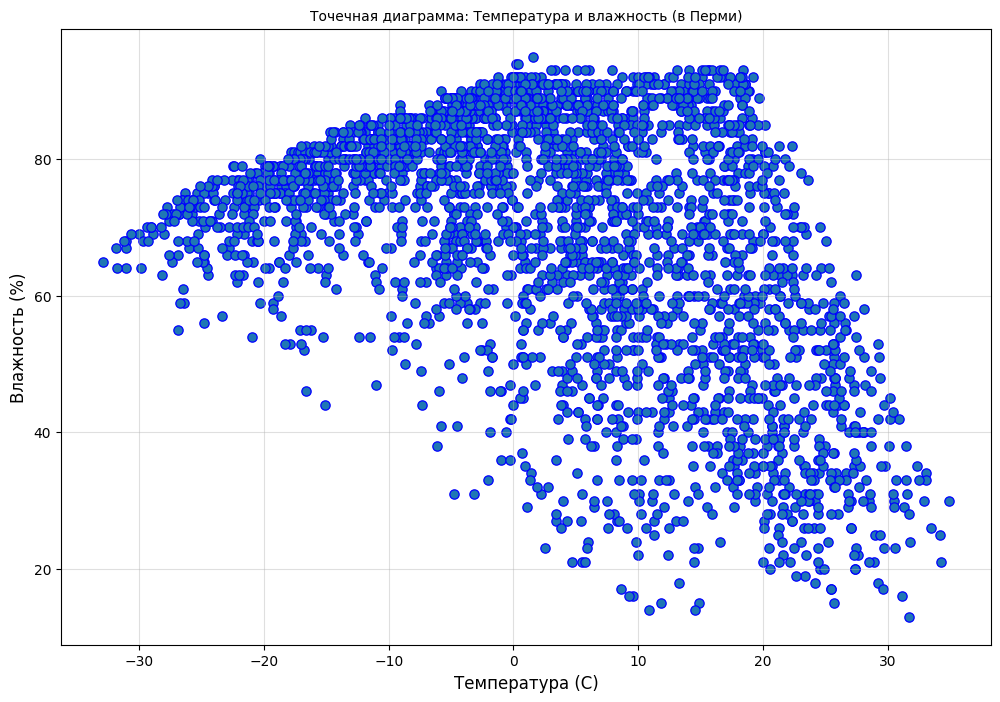

In [ ]:
# Пункт 2 - строим точечную диаграмму рассеяния по признакам температуры и влажности.
plt.figure(figsize=(12, 8))
plt.scatter(dataF['temperature'], dataF['Vlashnost'], edgecolor='blue', linewidth=0.9, s=45)
plt.xlabel('Температура (C)', fontsize=12)
plt.ylabel('Влажность (%)', fontsize=12)
plt.title('Точечная диаграмма: Температура и влажность (в Перми)', fontsize=10)
plt.grid(True, alpha=0.4)
plt.show()

Сделали диаграмму рассеяния по признакам температуры и относительной влажности, на которой видим, что в Перми более высокая влажность при низкой температуре и наоборот.

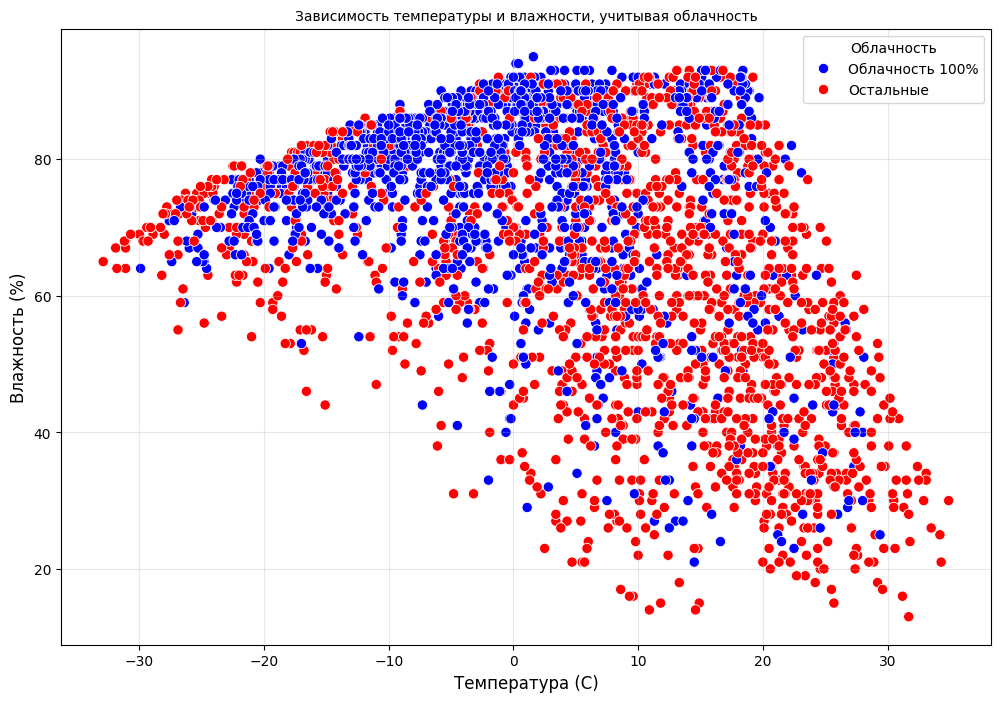

In [ ]:
# Пункт 3 - выделяем точки разными цветами в зависимости от облачности.
dataF['Vid_Oblachnost'] = np.where(dataF['Oblachnost'] == 100, 'Облачность 100%', 'Остальные')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataF, x='temperature', y='Vlashnost', hue='Vid_Oblachnost',
                palette={'Облачность 100%': 'blue', 'Остальные': 'red'}, s=55)
plt.title('Зависимость температуры и влажности, учитывая облачность', fontsize=10)
plt.xlabel('Температура (C)', fontsize=12)
plt.ylabel('Влажность (%)', fontsize=12)
plt.legend(title='Облачность')
plt.grid(True, alpha=0.3)
plt.show()

Используем seaborn для автоматического разделения точек по категориям облачности. Большинство точек с 100% облачностью расположены в зоне низких температур и высокой влажности.

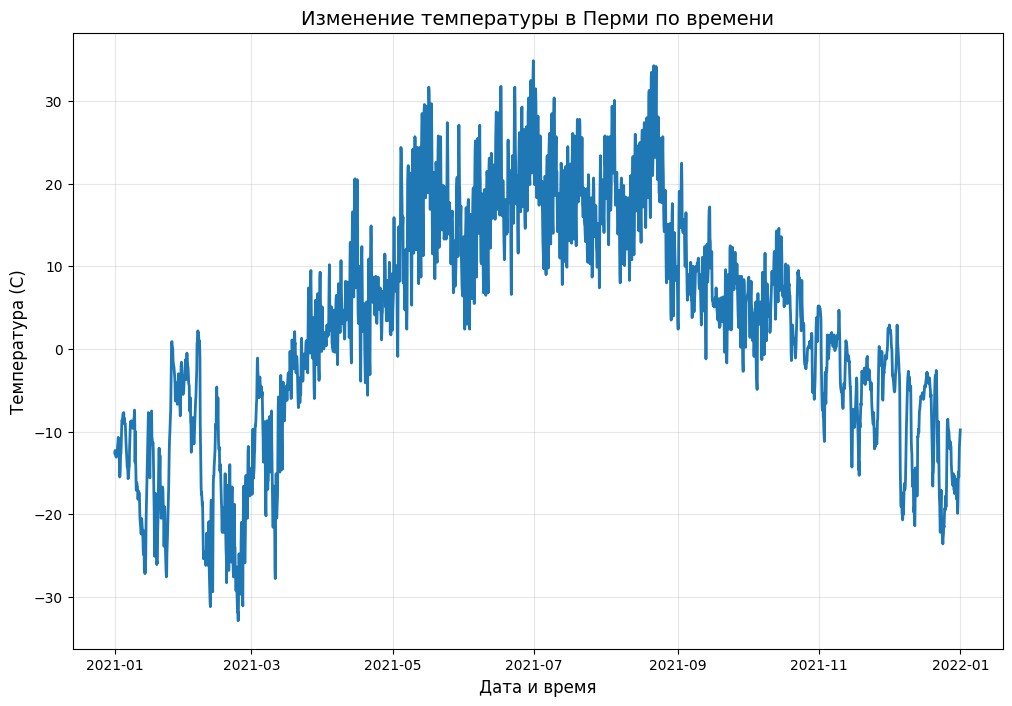

In [ ]:
# Пункт 4 - линейная диаграмма изменения температуры от времени.
plt.figure(figsize=(12, 8))
plt.plot(dataF['time'], dataF['temperature'], linewidth=2)
plt.xlabel('Дата и время', fontsize=12)
plt.ylabel('Температура (C)', fontsize=12)
plt.title('Изменение температуры в Перми по времени', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

Построили линейную диаграмму, на которой видно, что температура колеблется характерно региону в зависимости от времени года, летом может достигать чуть выше 30 градусов по цельсию, а зимой чуть выше -30 градусов. Зимой температурные скачки большие.

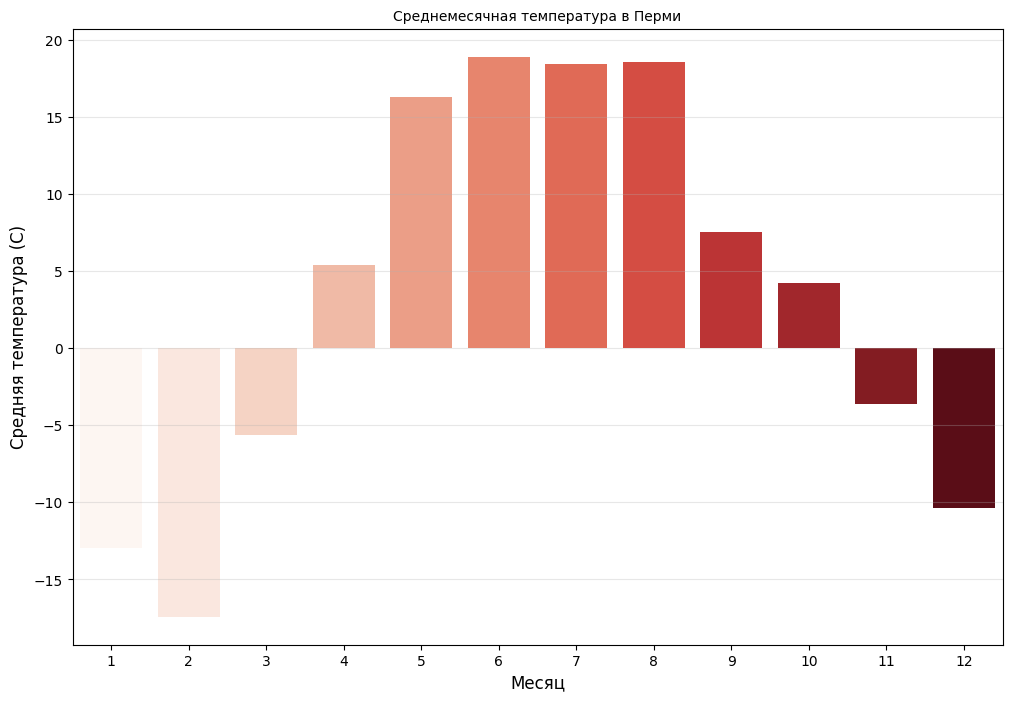

In [ ]:
# Пункт 5 - зависимость средней температуры от месяца.
dataF['month'] = dataF['time'].dt.month

monthly_avg_temp = dataF.groupby('month')['temperature'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=monthly_avg_temp, x='month', y='temperature', hue='month', palette='Reds', legend=False)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Средняя температура (C)', fontsize=12)
plt.title('Среднемесячная температура в Перми', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

Извлекаем месяц из столбца с местным временем, а затем группируем данные. Мы видим, что самая низкая среднемесячная температура в феврале (примерно -17 градусов по цельсию), а самая высокая в июне и июле (в районе 18-19 градусов).

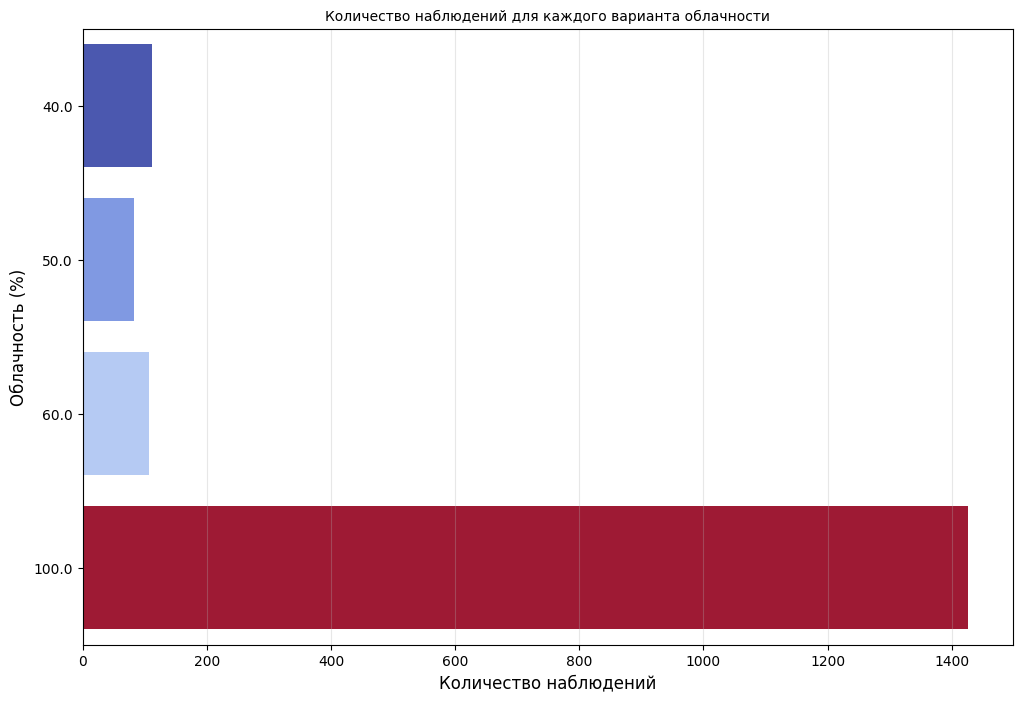

In [ ]:
# Пункт 6 - ленточная диаграмма количества наблюдений по облачности.
cloudiness_counts = dataF['Oblachnost'].value_counts().sort_index()

# Строим горизонтальную ленточную диаграмму.
plt.figure(figsize=(12, 8))
sns.barplot(x=cloudiness_counts.values, y=cloudiness_counts.index, hue=cloudiness_counts.index, palette='coolwarm', orient='h', legend=False)
plt.xlabel('Количество наблюдений', fontsize=12)
plt.ylabel('Облачность (%)', fontsize=12)
plt.title('Количество наблюдений для каждого варианта облачности', fontsize=10)
plt.grid(True, alpha=0.3, axis='x')
plt.show()

Строим ленточную диаграмму горизонтальную, на которой видим количество наблюдений для каждого варината облачности. Итого больше всего наблюдений у 100% облачности, примерно 1450+-, а меньше всего у 50%.

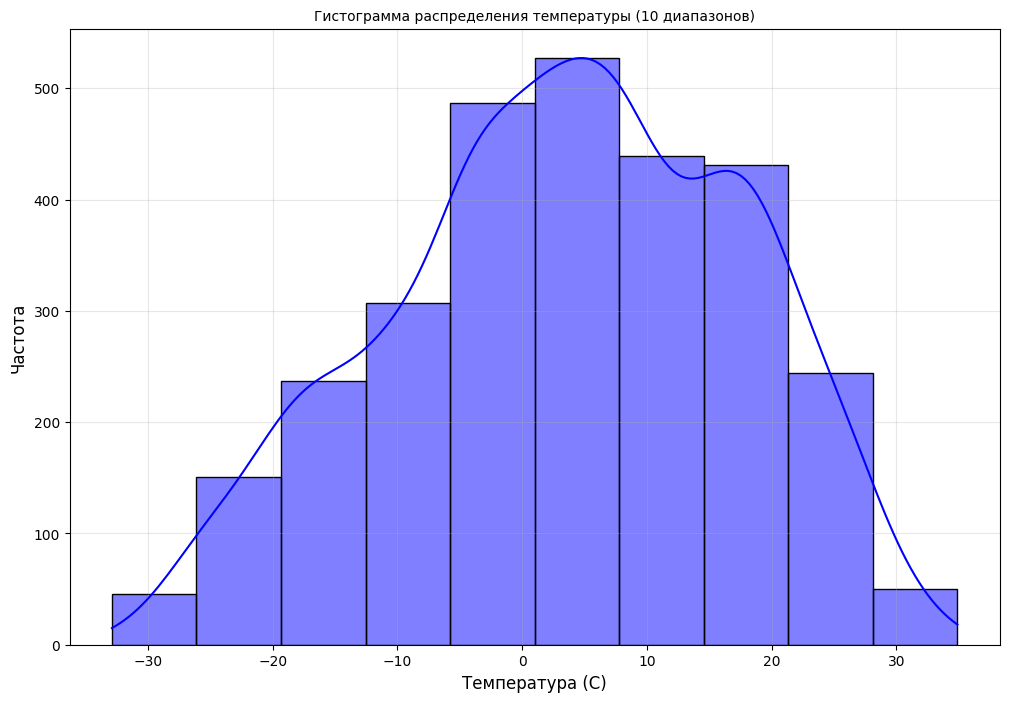

In [ ]:
# Пункт 7 - гистограмма частот для температуры с 10 диапазонами.
plt.figure(figsize=(12, 8))
sns.histplot(data=dataF, x='temperature', bins=10, kde=True, color='blue')
plt.xlabel('Температура (C)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Гистограмма распределения температуры (10 диапазонов)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

Строим гистрограмму распределения температуры с 10 интервалами, которая показывает как часто температуры встречаются в разных диапазонах.

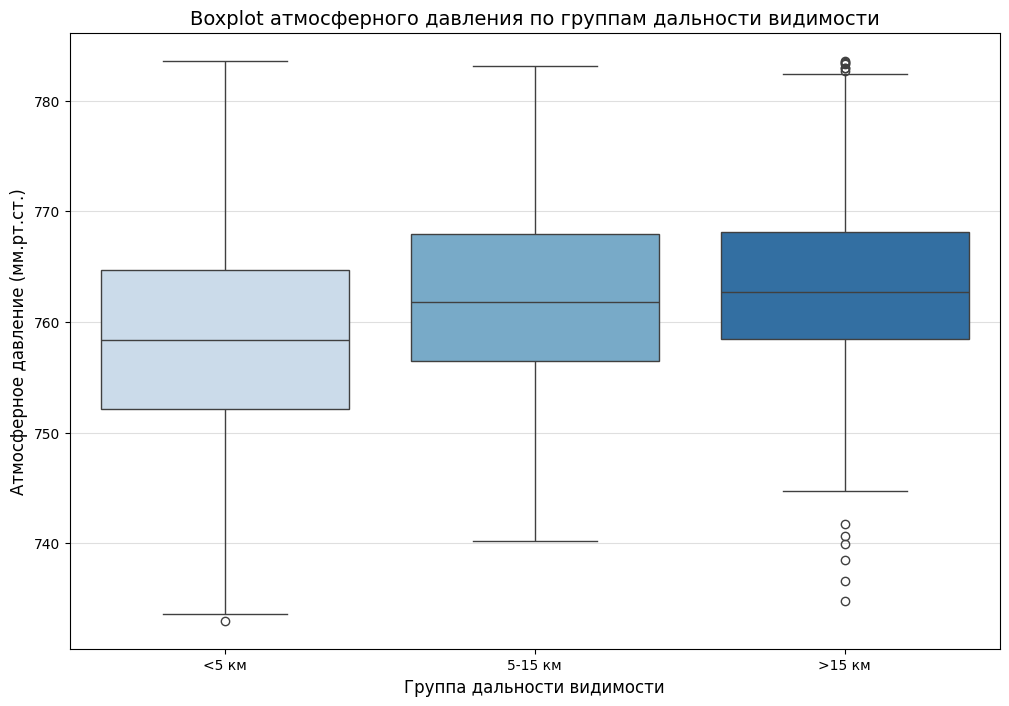

In [ ]:
# Пункт 8 - разбиваем данные на 3 группы по дальности видимости и строим boxplot для давления.
dataF['visibility'] = pd.cut(dataF['Dalnost_vidimosty'], bins=[0, 5, 15, float('inf')], labels=['<5 км', '5-15 км', '>15 км'])

# Строим boxplot для атмосферного давления по группам видимости.
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataF, x='visibility', y='atmosphere_davlenie', hue='visibility', palette='Blues', legend=False)
plt.xlabel('Группа дальности видимости', fontsize=12)
plt.ylabel('Атмосферное давление (мм.рт.ст.)', fontsize=12)
plt.title('Boxplot атмосферного давления по группам дальности видимости', fontsize=14)
plt.grid(True, alpha=0.4, axis='y')
plt.show()

Указываем промежутки видимости (менее 5 км, от 5 до 15, и более 15), строим ящик с усами и видим, что при плохой видимости давление ниже, а при хорошей выше. Низкое давление возникает при облачности и осадках.

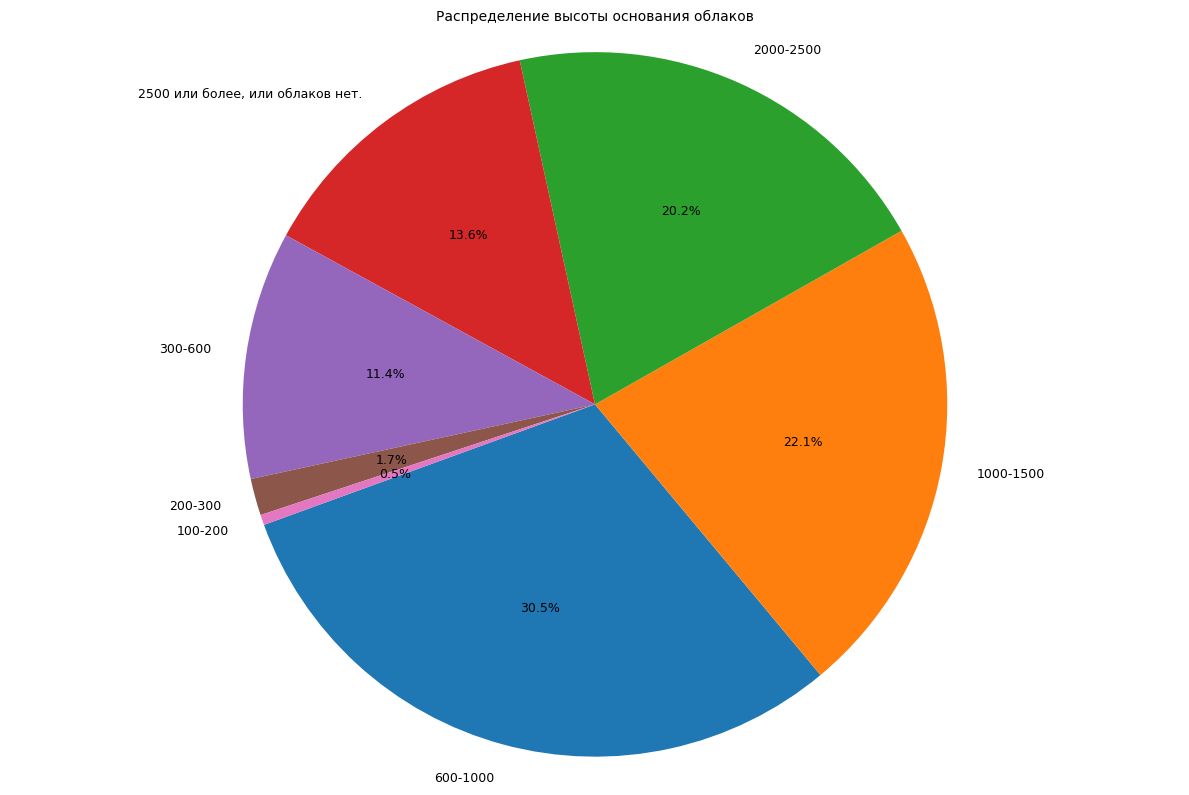

In [ ]:
# Пункт 9 - круговая диаграмма для высоты облаков.
height_counts = dataF['cloud_height'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(height_counts.values, labels=height_counts.index, autopct='%1.1f%%', startangle=200, textprops={'fontsize': 9})
plt.title('Распределение высоты основания облаков', fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()

Делаем круговую диаграмму для признака высоты основания. plt.pie() - создание круговой диаграммы, autopct='%1.1f%% - добавление процентов (с одной цифрой после запятой). Что мы видим? Больше всего диапазон 600-1000 метров, 30.5%,  аменьше всего 100-200 метров, всего 0.5%.